---

<h1><center> Insights into US Airbnb Listing Metrics using Zillow Home Value Index and Real Estate Data</center></h1>


---
### *An analysis of Airbnb listings in popular US travel destinations in conjuction with Zillow's residential real estate data to predict price, value, popularity of Airbnb listings given the housing climate of a US city.*
---
### This exploration will be conducted in four parts:
**Part 1:**  *What are the Airbnb listing trends in the U.S. Market? *

** Part 2:**  * The Zillow Home Value Index (ZHVI) And Airbnb Metrics, Listing Price *

**Part 3:** *Given ZHVI and listing trends, develop model that can predict Price given these two sets of features.*

Airbnb Data Source: http://insideairbnb.com/

Zillow Data Source: http://www.zillow.com/research/data/

In [20]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import *
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [5]:
def read_data(location):
    location = location[['id', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'price', 'minimum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_value']]
    return location

def get_stats(location):
    x = ['accommodates', 'bathrooms', 'bedrooms', 'price', 'minimum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_value']
    location = location.loc[:, x]
    location_stats = location.describe()
    location_stats = concat([location_stats.ix[0:4], location_stats.ix[7:]])
    return location_stats

def reorder(location):
    new = location.set_index('location', append = True).unstack(0)
    return new

---
# The Airbnb Data

## a) Reading and Cleaning:

In [6]:
austin = read_csv('austin.csv')
austin = read_data(austin)
austin['price'] = austin['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

boston = read_csv('boston.csv')
boston = read_data(boston)
boston['price'] = boston['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

dc = read_csv('dc.csv')
dc = read_data(dc)
dc['price'] = dc['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

denver = read_csv('denver.csv')
denver = read_data(denver)
denver['price'] = denver['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

la = read_csv('la.csv')
la = read_data(la)
la['price'] = la['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

nashville = read_csv('nashville.csv')
nashville = read_data(nashville)
nashville['price'] = nashville['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

nyc = read_csv('nyc.csv')
nyc = read_data(nyc)
nyc['price'] = nyc['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

portland = read_csv('portland.csv')
portland = read_data(portland)
portland['price'] = portland['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

sandiego = read_csv('sandiego.csv')
sandiego = read_data(sandiego)
sandiego['price'] = sandiego['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

seattle = read_csv('seattle.csv')
seattle = read_data(seattle)
seattle['price'] = seattle['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

sf = read_csv('sf.csv')
sf = read_data(sf)
sf['price'] = sf['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

neworleans = read_csv('new_orleans.csv')
neworleans = read_data(neworleans)
neworleans['price'] = neworleans['price'].map(lambda x: str(x)[1:]).convert_objects(convert_numeric=True)

A look into the Airbnb listing features provided for each city by the data:

## b) Getting Statistics on Airbnb Data:

Creating a dataframe to house statistical summaries of the listing data so that we can analyze listing trends.

In [7]:
austin_s = get_stats(austin)
austin_s['location'] = 'Austin, TX'
austin_s = reorder(austin_s)

boston_s = get_stats(boston)
boston_s['location'] = 'Boston, MA'
boston_s = reorder(boston_s)

dc_s = get_stats(dc)
dc_s['location'] = 'Washington, DC'
dc_s = reorder(dc_s)

denver_s = get_stats(denver)
denver_s['location'] = 'Denver, CO'
denver_s = reorder(denver_s)

la_s = get_stats(la)
la_s['location'] = 'Los Angeles-Long Beach-Anaheim, CA'
la_s = reorder(la_s)

nashville_s = get_stats(nashville)
nashville_s['location'] = 'Nashville, TN'
nashville_s = reorder(nashville_s)

nyc_s = get_stats(nyc)
nyc_s['location'] = 'New York, NY'
nyc_s = reorder(nyc_s)

portland_s = get_stats(portland)
portland_s['location'] = 'Portland, OR'
portland_s = reorder(portland_s)

sandiego_s = get_stats(sandiego)
sandiego_s['location'] = 'San Diego, CA'
sandiego_s = reorder(sandiego_s)

seattle_s = get_stats(seattle)
seattle_s['location'] = 'Seattle, WA'
seattle_s = reorder(seattle_s)

sf_s = get_stats(sf)
sf_s['location'] = 'San Francisco, CA'
sf_s = reorder(sf_s)

neworleans_s = get_stats(neworleans)
neworleans_s['location'] = 'New Orleans, LA'
neworleans_s = reorder(neworleans_s)

statistics = concat([austin_s, boston_s, dc_s, denver_s, la_s, nashville_s, nyc_s, portland_s, sandiego_s, seattle_s, sf_s, neworleans_s])
statistics.head(2)

accommodates                                bathrooms       \
                  count   max      mean  min       std     count  max   
location                                                                
Austin, TX       5835.0  16.0  4.388175  1.0  2.689056    5789.0  8.0   
Boston, MA       3585.0  16.0  3.041283  1.0  1.778929    3571.0  6.0   

                                       ...    review_scores_accuracy        \
                mean  min       std    ...                     count   max   
location                               ...                                   
Austin, TX  1.479617  0.0  0.774630    ...                    3776.0  10.0   
Boston, MA  1.221647  0.0  0.501487    ...                    2762.0  10.0   

                                    review_scores_value                       \
                mean  min       std               count   max      mean  min   
location                                                                       
Austin, TX  9.645657  2.0  0.757809              3778.0  10.0  9.416093  2.0   
Boston, MA  9.431571  2.0  0.931863              2764.0  10.0  9.168234  2.0   

                      
                 std  
location              
Austin, TX  0.892991  
Boston, MA  1.011116  

[2 rows x 50 columns]

Columns included in statistical summary:

In [59]:
statistics.columns.values

array([('accommodates', 'count'), ('accommodates', 'max'),
       ('accommodates', 'mean'), ('accommodates', 'min'),
       ('accommodates', 'std'), ('bathrooms', 'count'),
       ('bathrooms', 'max'), ('bathrooms', 'mean'), ('bathrooms', 'min'),
       ('bathrooms', 'std'), ('bedrooms', 'count'), ('bedrooms', 'max'),
       ('bedrooms', 'mean'), ('bedrooms', 'min'), ('bedrooms', 'std'),
       ('price', 'count'), ('price', 'max'), ('price', 'mean'),
       ('price', 'min'), ('price', 'std'), ('minimum_nights', 'count'),
       ('minimum_nights', 'max'), ('minimum_nights', 'mean'),
       ('minimum_nights', 'min'), ('minimum_nights', 'std'),
       ('availability_365', 'count'), ('availability_365', 'max'),
       ('availability_365', 'mean'), ('availability_365', 'min'),
       ('availability_365', 'std'), ('number_of_reviews', 'count'),
       ('number_of_reviews', 'max'), ('number_of_reviews', 'mean'),
       ('number_of_reviews', 'min'), ('number_of_reviews', 'std'),
       ('revie

---

# Part 1: Exploring Airbnb Data -- Listing Trends in U.S. Cities
Looking at descriptive statistics in each city to explore listing trends.

### Count of Listings per City: Which cities have the most listings?

New York and Los Angeles are outliers with a relatively far larger amount of listings than the others. This high supply of listings suggests that they are the more popular travel destinations. San Francsico comes in third and San Diego fourth. 

As expected, smaller and less frequented cities Portland, Nashville and Denver have the least amount of listings.

In [17]:
x = {'Austin': len(austin), 'Boston' : len(boston), 
     'Washington' : len(dc), 'Denver' : len(denver), 
     'Los Angeles': len(la), 'Nashville': len(nashville), 
     'New York': len(nyc), 'Portland' : len(portland), 
     'San Diego' : len(sandiego), 'Seattle' : len(seattle), 
     'San Francisco' : len(sf), 'New Orleans' : len(neworleans) }

df = DataFrame(x, index=[0]).stack()
df = DataFrame(df).sort([0], ascending=[False]).reset_index(0)
df[0]

New York         39553
Los Angeles      26080
San Francisco     8619
San Diego         6608
Austin            5835
New Orleans       4514
Seattle           3818
Washington        3723
Boston            3585
Portland          3360
Nashville         3277
Denver            2505
Name: 0, dtype: int64

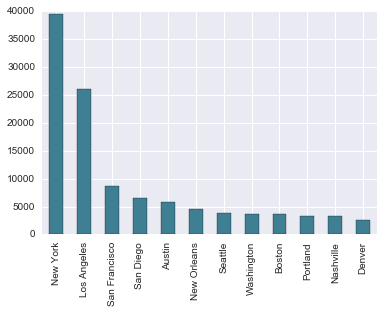

In [19]:
df[0].plot(kind = 'bar', cmap = cmap)

### Average Price per City: Where is it the most and least expensive to stay, on average, at an Airbnb listing?

Austin, San Francisco and Nashville have the most expensive listing prices on average, while Denver, Seattle and  Portland are the cheaper places to stay, on average. 

A high price might suggest that the supply of listings is low and therefore hosts are not competitive when it comes to price. The two citites with the highest number fo listings, New York adn Los Angeles have prices that fall at the lower end of the distribution, which may suggest that a higher number of listings makes the market more competitive and drives prices down. 

In [62]:
DataFrame(statistics['price']['mean'].convert_objects(convert_numeric=True)).sort(['mean'], ascending=[False])

,mean
location,
"Austin, TX",231.503207
"San Francisco, CA",208.376430
"Nashville, TN",188.836252
"San Diego, CA",183.789750
"New Orleans, LA",172.031998
"Boston, MA",169.072768
"Los Angeles-Long Beach-Anaheim, CA",146.567610
"Washington, DC",142.323251
"New York, NY",140.057827


### Average Availability of Listings: What cities are more popular to visit?

The first metric measured here is the average number of available days that can be booked in the next year. The lower the availibility the more popular a city is. The most popular travel destinations for users are San Francisco, New York, Boston. These are large cities so the data makes sense.

Interestingly, Portland and Denver come in as the fourth and fifth most popular. These citites' listings are characterized by a low number of listings and low price. Users may be drawn to these cities due to thier low prices.

The second dataframe is another metric that can be used to determine the popularity of listings in a particular city, mean # of reviews per city. The more that a city is reviewed on average, the more the listing is booked on average. There are similarities in order of the cites in the two lists. 

Interestingly, Seattle jumps from the bottom of the list on availability and towards the top on # of reviews. So although Seattle isn't a popular place for travelers relative to the other cities included in the data set, it is well reviewed. This may be an indication of the superior value of Seattle airbnb listings. 

In [65]:
x = ((statistics['availability_365']['mean'] / 365)*100).convert_objects(convert_numeric=True)
DataFrame(x).sort(['mean'], ascending=[True])

,mean
location,
"San Francisco, CA",39.314957
"New York, NY",43.143450
"Boston, MA",49.136012
"Portland, OR",53.292808
"Denver, CO",53.427939
"San Diego, CA",55.336164
"New Orleans, LA",58.427176
"Nashville, TN",60.055346
"Los Angeles-Long Beach-Anaheim, CA",60.937369


In [63]:
DataFrame(statistics['number_of_reviews']['mean'].convert_objects(convert_numeric=True)).sort(['mean'], ascending=[False])

,mean
location,
"Portland, OR",32.643750
"Nashville, TN",25.443699
"New Orleans, LA",24.719539
"Seattle, WA",22.223415
"San Francisco, CA",19.693352
"Boston, MA",19.044630
"Denver, CO",18.544511
"Los Angeles-Long Beach-Anaheim, CA",16.848735
"Washington, DC",15.306742


### Price and Availibility Listings: What the relationship between the popularity of a listing and its price?
There seems to a positive coorelation beetween the price and percent availibility of a listing. 

This means that the more/less popular a listing(lower/higher the % Availabiliy) the lower/higher the price. This seems to be in line with the logic that cities which are popular to travel to must be more competive on price, which drives them down. 

Some outliers are San Francisco which is popular, but still more expensive and Austin which is expensive as well but ont he lower end of the popularity spectrum. 

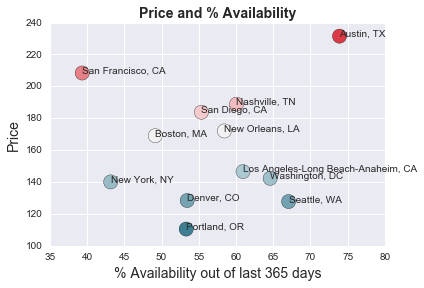

In [27]:
x = ((statistics['availability_365']['mean'] / 365)*100).convert_objects(convert_numeric=True)
y = statistics['price']['mean'].convert_objects(convert_numeric=True)

n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, c=y,cmap = cmap , s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
    
plt.xlabel('% Availability out of last 365 days', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price and % Availability', fontsize=14, fontweight='bold')

### Price and Average Rating: How does the average quality of a listing coorelate to the average price?
The data here is very dispersed and suggests that ratings and price do not have a clear relationship. 

This reveals an interesting quality of Airbnb listings relative to the traditional hotel industry. Even if a user pays more or less for a listing this does not have much to do with the quality of thier stay. In the traditional hotel industry the quality of your stay is very driven by the price (hotel vs. motel). Usually the more one pays the better your stay, whereas Airbnb users can pay minimally and have a great experience (Portland) or the other way around (Boston for example, has a low rating for its average price).

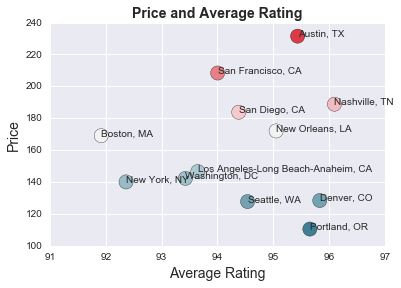

In [9]:
x = statistics['review_scores_rating']['mean'].convert_objects(convert_numeric=True)
y = statistics['price']['mean'].convert_objects(convert_numeric=True)

n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, c=y,cmap = cmap, s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
    
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price and Average Rating', fontsize=14, fontweight='bold')

In [63]:
DataFrame(statistics['number_of_reviews']['mean'].convert_objects(convert_numeric=True)).sort(['mean'], ascending=[False])

,mean
location,
"Portland, OR",32.643750
"Nashville, TN",25.443699
"New Orleans, LA",24.719539
"Seattle, WA",22.223415
"San Francisco, CA",19.693352
"Boston, MA",19.044630
"Denver, CO",18.544511
"Los Angeles-Long Beach-Anaheim, CA",16.848735
"Washington, DC",15.306742


### Coorelation Matrix for Airbnb Listing Data: Which Airbnb metrics are related to each other and how?

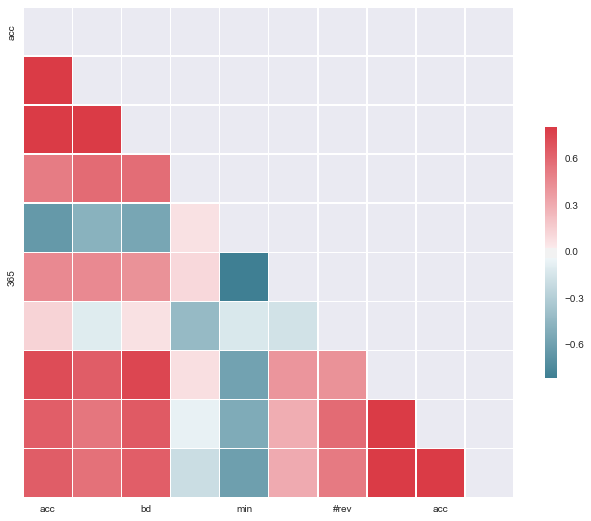

In [28]:
df1 = statistics.iloc[:,[2,7,12,17,22,27,32,37,42,47]].reset_index().drop('location',axis = 1).fillna(0)
df1.columns = df1.columns.droplevel(1)
df1.columns = ['acc', 'bt', 'bd', 'pr', 'min', '365', '#rev', 'rat', "acc", "val"]
#df_zillow = df_zillow['ZHVI_10Year']
#df1 = concat([df1, df_zillow], axis = 1).fillna(0)

coor= df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(df1.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df1.corr(), mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

---

# The Zillow Real Estate Data


### What is the Zillow Home Value Index?
#### From, Methodology for determining the ZHVI: http://www.zillow.com/research/zhvi-methodology-6032/

The ideal home price index would be based off sale prices for the same set of homes in each time period so there was never an issue of the sales mix being different across periods. This approach of using a constant basket of goods is widely used, common examples being a commodity price index and a consumer price index. Unfortunately, unlike commodities and consumer goods, for which we can observe prices in all time periods, we can’t observe prices on the same set of homes in all time periods because not all homes are sold in every time period.

The innovation that Zillow developed is a way of approximating this ideal home price index by leveraging the valuations Zillow creates on all homes (called Zestimates). Instead of actual sale prices on every home, the index is created from estimated sale prices on every home. Because of this fact, the distribution of actual sale prices for homes sold in a given time period looks very similar to the distribution of estimated sale prices for this same set of homes. But, importantly, Zillow has estimated sale prices not just for the homes that sold, but for all homes even if they didn’t sell in that time period. 

**Using this methodology, we now have  a comprehensive and robust benchmark of home value trends can be computed which is immune to the changing mix of properties that sell in different periods of time.**

### Zillow Home Value Index (Median Home Value):

In [11]:
ZHVI = read_csv('Metro_Zhvi_Summary_AllHomes (1).csv').set_index('RegionName')


x = ['Austin, TX', 'Boston, MA', 'Washington, DC', 'Denver, CO', 'Los Angeles-Long Beach-Anaheim, CA', 'Nashville, TN', 'New York, NY', 'Portland, OR', 'San Diego, CA', 'Seattle, WA', 'San Francisco, CA', 'New Orleans, LA']
y = ['Zhvi', 'MoM', 'QoQ', 'YoY', '5Year', '10Year']

ZHVI = ZHVI.loc[x , y ]

**Putting all the data into one Dataframe for coorelation analysis:**

In [12]:
df_zillow = ZHVI
df_zillow.columns = ['ZHVI', 'ZHVI_MoM', 'ZHVI_QoQ', 'ZHVI_YoY', 'ZHVI_5Year', 'ZHVI_10Year']
df_zillow

,ZHVI,ZHVI_MoM,ZHVI_QoQ,ZHVI_YoY,ZHVI_5Year,ZHVI_10Year
RegionName,,,,,,
"Austin, TX",258600.0,0.002714,0.012133,0.083822,0.082968,0.039407
"Boston, MA",405200.0,0.007209,0.019115,0.059623,0.053598,0.010531
"Washington, DC",375900.0,0.004275,0.011572,0.026488,0.037900,-0.010914
"Denver, CO",350400.0,0.007476,0.023066,0.101887,0.102926,0.040802
"Los Angeles-Long Beach-Anaheim, CA",584700.0,0.005157,0.014752,0.059815,0.083031,-0.002961
"Nashville, TN",202400.0,0.012000,0.031600,0.114537,0.066053,0.027840
"New York, NY",398000.0,0.005558,0.023136,0.057386,0.029412,-0.011078
"Portland, OR",349500.0,0.009241,0.029455,0.146277,0.101233,0.020504
"San Diego, CA",524900.0,0.004017,0.015084,0.064058,0.086299,-0.000266


---

# Part 2: Listing Trends and the Real Estate Metrics

###  How does the median home price of a city influence the price of an Airbnb listing?
The average price of a listing seems to increase as the median home value, as measured by the Zillow Home Value Index increases. 

Nashville and Austin are two outliers, with low median home values and high average listing prices.

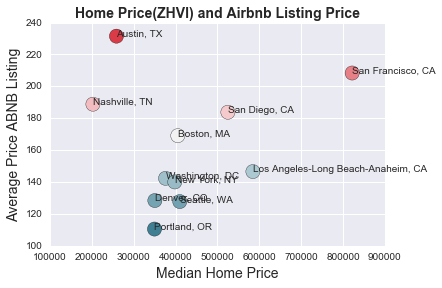

In [13]:
df = concat([statistics['price']['mean'], df_zillow['ZHVI']], axis = 1).dropna()

x = df['ZHVI']
y = df['mean']


n = (df.index).tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, c=y,cmap = cmap, s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
    
plt.xlabel('Median Home Price', fontsize=14)
plt.ylabel('Average Price ABNB Listing', fontsize=14)
plt.title('Home Price(ZHVI) and Airbnb Listing Price', fontsize=14, fontweight='bold')


### How does the change in home price over five years coorelate to the price? Are listings in emerging cities, with high growth, priced at a higher value?
A little over half the data follow the relationhip of the average listing price increasing as home value increases. However, LA, Seattle, Denver and Portland have had high growth in home values over the last five years yet have maintianed relatively low prices. 

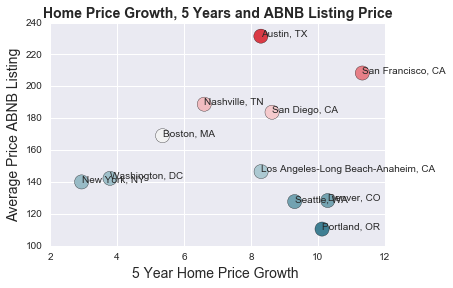

In [14]:
df = concat([statistics['price']['mean'], df_zillow['ZHVI_5Year']], axis = 1).dropna()

x = df['ZHVI_5Year'] *100
y = df['mean']

n = (df.index).tolist()

fig, ax = plt.subplots()
ax.scatter(x, y, c=y,cmap = cmap , s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
plt.xlabel('5 Year Home Price Growth ', fontsize=14)    
plt.ylabel('Average Price ABNB Listing', fontsize=14)
plt.title('Home Price Growth, 5 Years and ABNB Listing Price', fontsize=14, fontweight='bold')

### Coorelation Matrix for ZHVI: How do ZHVI metrics relate to one another?

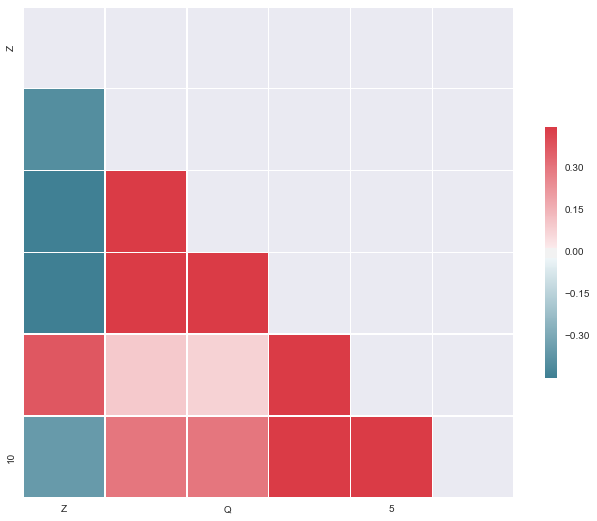

In [270]:
df2 = df_zillow
df2.columns = ['Z', 'M', 'Q', 'Y', '5', '10']
coor= df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(df2.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df2.corr(), mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

### Coorelation Matrix for ZHVI and Price: How do Listing Price and Home Value relate?

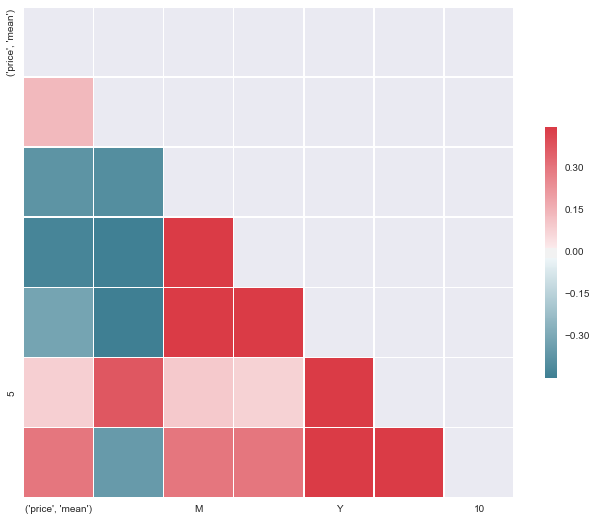

In [282]:
df1 = DataFrame(statistics.iloc[:,17])
df = concat([df1, df2], axis =1)
coor= df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
a
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=2, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

---
# Part 3: Listing Price Prediction Model with ZHVI